In [7]:
#Importing all packages relevant
import pandas as pd
from plotnine import *
import numpy as np
import glob as glob
import os
# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', None)

In [8]:
all_files = glob.glob(("data/*.csv"))
df_all = pd.concat((pd.read_csv(f, low_memory=False) for f in all_files))
df_all['Winner'] = np.where(df_all['Position'] == 1, 1,0)


#### Checking this sentence

> However, in India it has historically been far more common for incumbents to be ousted after having served in office

**Verdict:** ⛔️ Seems not true?*

*note: This does not take into account those who have been "ousted" and didn't contest at all. If that is common, my conclusions may not be right.


In [52]:
# grabbing only incumbents to see if they have been more often outsted than served 

df_incumbent = df_all.query('Incumbent==True')
display(df_incumbent.head(2))

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Unnamed: 0,year,state,no_constituencies,no_candidates,no_incumbents_participating,no_incumbents_winning,percentage_winner,Winner
497,AE,Assam,4.0,24.0,1967.0,2.0,0.0,2.0,1.0,B . B . LYNGDOH,M,AHL,0.0,NaN,0.0,46293.0,NONGPOH,SC,NaN,1.0,0.00,NaN,no,0.0,NaN,NaN,AEAS196900,Local Party,817.0,True,2.0,HLC,817.0,NONGPOH,True,True,2.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
817,AE,Assam,4.0,105.0,1967.0,2.0,0.0,2.0,2.0,K. BORBARUA,M,IND,8454.0,NaN,20638.0,38598.0,AMGURI,GEN,NaN,4.0,53.47,40.96,no,5953.0,28.84,2.56,AEAS197666,Independents,10809.0,True,2.0,RCP,7183.0,AMGURI,True,False,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


🤔 Hmm...of all the incumbents that ran in any year, looks like about half of them won and half lost

In [72]:
df_incumbent.value_counts('Winner')

Winner
1    13777
0    13752
dtype: int64

🤔 Hmm...seems like that is roughly the case across all years. In any case, doesn't seem "far more common" for incumbents to lose (see below)

In [83]:
(
    pd.crosstab(df_incumbent.Year, df_incumbent.Winner, margins=True)[:-1]
        .query('All > 50')
        .assign(pct_won = lambda x: ((x[1] / x['All']) * 100).round(2))
).T

Year,1967.0,1969.0,1970.0,1971.0,1972.0,1974.0,1975.0,1977.0,1978.0,1980.0,1982.0,1983.0,1984.0,1985.0,1987.0,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Winner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,119.0,75.00,28.00,97.00,347.00,194.0,32.00,777.00,202.0,778.00,156.00,273.0,78.0,637.00,157.00,45.0,416.0,567.00,412.00,461.00,236.00,409.00,351.00,57.00,332.00,315.00,248.0,241.00,319.0,334.00,343.0,182.00,213.00,359.00,383.00,295.00,53.00,252.00,298.00,427.00,334.00,114.00,224.00,362.00,417.0,324.00,102.0,164.00,178.00
1,165.0,81.00,29.00,106.00,395.00,170.0,37.00,420.00,105.0,580.00,326.00,211.0,121.0,779.00,301.00,55.0,319.0,413.00,393.00,356.00,136.00,398.00,410.00,22.00,430.00,363.00,213.0,325.00,275.0,292.00,343.0,271.00,331.00,329.00,422.00,282.00,74.00,259.00,317.00,402.00,318.00,110.00,358.00,286.00,388.0,338.00,133.0,314.00,247.00
All,284.0,156.00,57.00,203.00,742.00,364.0,69.00,1197.00,307.0,1358.00,482.00,484.0,199.0,1416.00,458.00,100.0,735.0,980.00,805.00,817.00,372.00,807.00,761.00,79.00,762.00,678.00,461.0,566.00,594.0,626.00,686.0,453.00,544.00,688.00,805.00,577.00,127.00,511.00,615.00,829.00,652.00,224.00,582.00,648.00,805.0,662.00,235.0,478.00,425.00
pct_won,58.1,51.92,50.88,52.22,53.23,46.7,53.62,35.09,34.2,42.71,67.63,43.6,60.8,55.01,65.72,55.0,43.4,42.14,48.82,43.57,36.56,49.32,53.88,27.85,56.43,53.54,46.2,57.42,46.3,46.65,50.0,59.82,60.85,47.82,52.42,48.87,58.27,50.68,51.54,48.49,48.77,49.11,61.51,44.14,48.2,51.06,56.6,65.69,58.12


🤔 let's plot it by state, just for kicks...

In [84]:
piv = df_incumbent.pivot_table(
    index=['State_Name', 'Year'], columns='Winner', 
    values='Candidate', aggfunc='count', margins=1, 
    margins_name='total')\
    .query('total > 50')\
    .query('State_Name != "total"')\
    .assign(pct_won = lambda df: (df[1] / df['total'] * 100).round(1))\
    .reset_index()

piv.columns.name = None

display(piv.head(2))

,State_Name,Year,0,1,total,pct_won
0,Andhra_Pradesh,1978.0,64.0,28.0,92,30.4
1,Andhra_Pradesh,1983.0,97.0,29.0,126,23.0


/opt/homebrew/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/opt/homebrew/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


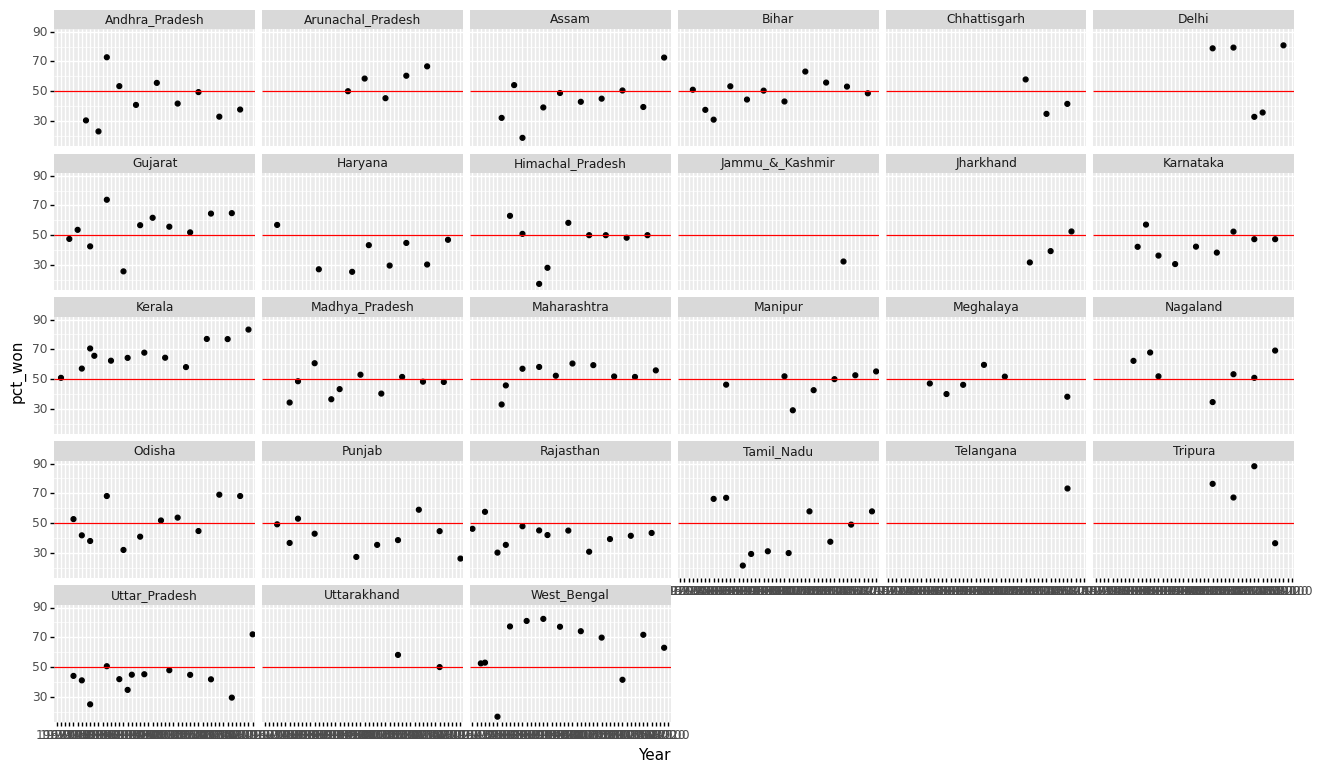

<ggplot: (727197444)>

In [63]:
display(

ggplot(piv, aes(x='Year', y='pct_won')) +
    geom_point() +
    geom_hline(aes(yintercept=50), color='red') + 
    facet_wrap('State_Name') + 
    theme(figure_size=(16,9))
)